# Fundamentos de Data Science

### Analizando la Rotación de Clientes en Telecomunicaciones

## Requisitos:

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

El dataset puede ser encontrado [aquí](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

## 1. Limpieza de datos con Python:

* Identificar y solucionar cualquier valor duplicado.
* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

## 2. Exploración de datos con Python:

* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

## Entrega

* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
* NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

## Notas:

* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
* Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
* Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.
* Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.
* No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.
* Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

# Resolución

## Limpieza de datos con Python

### Identificar y solucionar cualquier valor duplicado.

Primero que nada, cargamos el dataset en un dataframe de pandas.

In [148]:
import pandas as pd

camino_dataset = "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(camino_dataset, delimiter=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Luego, procedemos a encontrar filas duplicadas y analizarlas.

In [149]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


In [150]:
# Mostramos para corroborar que no hayan datos duplicados generales.
df_duplicados = df[df.duplicated()]
df_duplicados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [151]:
del df_duplicados

Al parecer, no existen valores duplicados si miramos por todas las columnas. Verificamos ahora si hay duplicados de Customer ID.

In [152]:
duplicados_customer_id = df.duplicated(["customerID"])

cant_registros_duplicados_customer_id = duplicados.sum()

print(f"Cant. de Registros Duplicados Customer ID: {cant_registros_duplicados_customer_id}")

Cant. de Registros Duplicados Customer ID: 0


In [153]:
df_duplicados_customer_id = df[df.duplicated(["customerID"])]

df_duplicados_customer_id.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [154]:
# Solo para corroborar, sacamos los clientes únicos y vemos si la cantidad es igual a la cantidad de filas del dataframe

clientes_unicos = df["customerID"].unique()

if len(clientes_unicos) != df.shape[0]:
    print("Hay mas de una fila para un solo cliente.")
else:
    print("Cada fila del dataframe corresponde a un cliente único.")

Cada fila del dataframe corresponde a un cliente único.


Como cada fila del dataframe corresponde a un cliente único, es improbable encontrar mas duplicaciones por otros campos, ya que los datos en cada fila solo le conciernen a ese cliente. Por este motivo, se asume que ya no hay más duplicados por otras columnas.

### Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

De la descripción de Kaggle, podemos sacar las siguientes columnas.

* customerID: El ID de cliente. Cadena.
* gender: Género del cliente. 
* SeniorCitizen: Si el cliente es mayor o no. Es 1 o 0. Numérico.
* Partner: Si el cliente posee una pareja o no (Yes, No). Cadena.
* Dependents: Si el ciente posee dependientes o no (Yes, No). Cadena.
* tenure: Número de meses que el cliente se quedó en la compañía. Numérico.
* PhoneService: Si el cliente posee servicio de telefonía o no (Sí, No). Cadena.
* MultipleLines: Si el cliente posee multiples líneas o no (Yes, No, No phone service). Cadena.
* InternetService: Proveedor de servicio de internet del cliente (DSL, Fiber optic, No). Cadena.
* OnlineSecurity: Si el cliente cuenta con seguridad en línea o no (Yes, No, No internet service). Cadena.
* OnlineBackup: Si el cliente posee backups online o no (Yes, No, No internet service). Cadena.
* DeviceProtection: Si el cliente cuenta con protección de dispositivos o no (Yes, No, No internet service). Cadena.
* TechSupport: Si el cliente cuenta con soporte técnico o no (Yes, No, No internet service). Cadena.
* StreamingTV: Si el cliente cuenta con TV en streaming o no. (Yes, No, No internet service). Cadena.
* StreamingMovies: Si el cliente cuenta con servicio de streaming de películas o no. (Yes, No, No internet service). Cadena.
* Contract: Duración del contrato del cliente(Nonth-to-month, One year, Two year). Cadena.
* PaperlessBilling: Si el cliente cuenta con facturación sin papel o no. (Yes, No). Cadena.
* PaymentMethod: El método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card). Cadena.
* MonthlyCharges: El monto facturado al cliente mensualmente. Flotante.
* TotalCharges: Total cobrado al cliente. Flotante.
* Churn: Si el cliente abandonó el servicio o no (Yes, No). Cadena.

Con las descripciones de las cadenas, se procede a crear el diccionario de tipo de datos esperados.

In [155]:
tipos_columnas_esperados = {
    "customerID": "string",
    "gender": "string",
    "SeniorCitizen": "int64",
    "Partner": "string",
    "Dependents": "string",
    "tenure": "int64",
    "PhoneService": "string",
    "MultipleLines": "string",
    "InternetService": "string",
    "OnlineSecurity": "string",
    "OnlineBackup": "string",
    "DeviceProtection": "string",
    "TechSupport": "string",
    "StreamingTV": "string",
    "StreamingMovies": "string",
    "Contract": "string",
    "PaperlessBilling": "string",
    "PaymentMethod": "string",
    "MonthlyCharges": "float64",
    "TotalCharges": "float64",
    "Churn": "string",
}

In [156]:
from utils import obtener_diferencias_tipos_columnas

diferencias = obtener_diferencias_tipos_columnas(df, tipos_columnas_esperados)

if len(diferencias) == 0:
    print("Todas las columnas del dataframe coinciden con los datos esperados.")
else:
    print("Se han encontrado errores en los tipos de columnas en el dataframe:")

    for diferencia in diferencias:
        print(f"- {diferencia}")

Se han encontrado errores en los tipos de columnas en el dataframe:
- Error en columna 'customerID'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'gender'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'Partner'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'Dependents'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'PhoneService'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'MultipleLines'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'InternetService'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'OnlineSecurity'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'OnlineBackup'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'DeviceProtection'. Tipo esperado es 'string' pero se encontró 'object'
- Error en columna 'TechSupport'. Tipo esperado es 'string' pero se

In [157]:
from utils import corregir_tipos_columnas

# Procedemos a corregir los errores
corregir_tipos_columnas(df, tipos_columnas_esperados)

Error al convertir la columna 'TotalCharges' a 'float64': could not convert string to float: ''


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Al parecer, la columan TotalCharges posee algunos valores que son cadenas, por lo cual, se procede a verificar cuáles son esos valores y por qué están así.

In [158]:
import numpy as np

# Forma de detectar datos no numericos en columnas encontrado aquí: https://stackoverflow.com/a/21772078
total_charges_no_numerico = pd.to_numeric(df["TotalCharges"], errors='coerce').isnull()

df[total_charges_no_numerico]



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Al parecer, estas columnas están vacías y se cargaron como cadenas. Verificamos las estadísticas de esta columna para ver si son nulos.

In [159]:
from utils import obtener_estadisticas_datos_nulos

obtener_estadisticas_datos_nulos(df[["TotalCharges"]])

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7043,0,0.0


Al parecer estos datos no se cargaron como nan, por lo que se debe verificar como se cargaron. Lo más probable es que sean cadenas con espacios, ya que si no se hubieran cargado como na. Convertimos estas filas manualmente.

In [160]:
df["TotalCharges"] = df.apply(lambda x: x["TotalCharges"].strip(), axis=1)
# Conversión encontrada aquí: https://scales.arabpsychology.com/stats/how-to-replace-empty-strings-with-nan-in-pandas/
df["TotalCharges"] = df["TotalCharges"].replace("", np.nan)

Volvemos a intentar la corrección de datos.

In [161]:
corregir_tipos_columnas(df, tipos_columnas_esperados)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Finalmente, las columnas ya fueron corregidas sin errores. Verificamos para asegurar.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


Adicionalmente, la columna SeniorCitizen son valores 0 o 1, por lo cual se puede convertir a Yes o No para mantener consistencia con las demás columnas.

In [163]:
# Verificamos primero los valores únicos en SeniorCitizen.
df["SeniorCitizen"].unique()

array([0, 1])

In [164]:
def convertir_senior_citizen(x):
    if x["SeniorCitizen"] == 1:
        return "Yes"
    
    return "No"


df["SeniorCitizen"] = df.apply(convertir_senior_citizen, axis=1).astype("string")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   string 
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


Con esto, ya todos los tipos de datos están correctos.

### Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

Primero, identificamos todas las columnas categóricas

In [165]:
from utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)
columnas_categoricas_sin_customer_id = [*columnas_categoricas]
columnas_categoricas_sin_customer_id.remove("customerID")

columnas_categoricas

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Verificamos los únicos en columnas categóricas excluyendo customerID ya que no hay ningún valor único en esta columna.

In [166]:
for columna_categorica in columnas_categoricas_sin_customer_id:
    valores_unicos = list(df[columna_categorica].dropna().unique())

    print(f"Valores únicos en columna {columna_categorica}: {str(valores_unicos)}")

Valores únicos en columna gender: ['Female', 'Male']
Valores únicos en columna SeniorCitizen: ['No', 'Yes']
Valores únicos en columna Partner: ['Yes', 'No']
Valores únicos en columna Dependents: ['No', 'Yes']
Valores únicos en columna PhoneService: ['No', 'Yes']
Valores únicos en columna MultipleLines: ['No phone service', 'No', 'Yes']
Valores únicos en columna InternetService: ['DSL', 'Fiber optic', 'No']
Valores únicos en columna OnlineSecurity: ['No', 'Yes', 'No internet service']
Valores únicos en columna OnlineBackup: ['Yes', 'No', 'No internet service']
Valores únicos en columna DeviceProtection: ['No', 'Yes', 'No internet service']
Valores únicos en columna TechSupport: ['No', 'Yes', 'No internet service']
Valores únicos en columna StreamingTV: ['No', 'Yes', 'No internet service']
Valores únicos en columna StreamingMovies: ['No', 'Yes', 'No internet service']
Valores únicos en columna Contract: ['Month-to-month', 'One year', 'Two year']
Valores únicos en columna PaperlessBilling

Limpiamos las columnas

In [167]:
from utils import limpiar_cadena


for columna_categorica in columnas_categoricas_sin_customer_id:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

En el caso de customerID, solo eliminamos espacios si existen.

In [168]:
df["customerID"] = df["customerID"].apply(lambda x: x.strip())

Volvemos a verificar

In [169]:
for columna_categorica in columnas_categoricas_sin_customer_id:
    valores_unicos = list(df[columna_categorica].dropna().unique())

    print(f"Valores únicos en columna {columna_categorica}: {str(valores_unicos)}")

Valores únicos en columna gender: ['female', 'male']
Valores únicos en columna SeniorCitizen: ['no', 'yes']
Valores únicos en columna Partner: ['yes', 'no']
Valores únicos en columna Dependents: ['no', 'yes']
Valores únicos en columna PhoneService: ['no', 'yes']
Valores únicos en columna MultipleLines: ['no phone service', 'no', 'yes']
Valores únicos en columna InternetService: ['dsl', 'fiber optic', 'no']
Valores únicos en columna OnlineSecurity: ['no', 'yes', 'no internet service']
Valores únicos en columna OnlineBackup: ['yes', 'no', 'no internet service']
Valores únicos en columna DeviceProtection: ['no', 'yes', 'no internet service']
Valores únicos en columna TechSupport: ['no', 'yes', 'no internet service']
Valores únicos en columna StreamingTV: ['no', 'yes', 'no internet service']
Valores únicos en columna StreamingMovies: ['no', 'yes', 'no internet service']
Valores únicos en columna Contract: ['month-to-month', 'one year', 'two year']
Valores únicos en columna PaperlessBilling

Según lo verificado, los valores únicos ya están todos estandarizados.

### Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

Verificamos estadísticas de datos nulos.

In [170]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
customerID,7043,0,0.00
DeviceProtection,7043,0,0.00
MonthlyCharges,7043,0,0.00
PaymentMethod,7043,0,0.00
PaperlessBilling,7043,0,0.00
Contract,7043,0,0.00
StreamingMovies,7043,0,0.00
StreamingTV,7043,0,0.00
TechSupport,7043,0,0.00


Verificamos los nulos en TotalCharges

In [171]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,female,no,yes,yes,0,no,no phone service,dsl,yes,...,yes,yes,yes,no,two year,yes,bank transfer (automatic),52.55,NaN,no
753,3115-CZMZD,male,no,no,yes,0,yes,no,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.25,NaN,no
936,5709-LVOEQ,female,no,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two year,no,mailed check,80.85,NaN,no
1082,4367-NUYAO,male,no,yes,yes,0,yes,yes,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.75,NaN,no
1340,1371-DWPAZ,female,no,yes,yes,0,no,no phone service,dsl,yes,...,yes,yes,yes,no,two year,no,credit card (automatic),56.05,NaN,no
3331,7644-OMVMY,male,no,yes,yes,0,yes,no,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,19.85,NaN,no
3826,3213-VVOLG,male,no,yes,yes,0,yes,yes,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.35,NaN,no
4380,2520-SGTTA,female,no,yes,yes,0,yes,no,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,20.00,NaN,no
5218,2923-ARZLG,male,no,yes,yes,0,yes,no,no,no internet service,...,no internet service,no internet service,no internet service,no internet service,one year,yes,mailed check,19.70,NaN,no
6670,4075-WKNIU,female,no,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two year,no,mailed check,73.35,NaN,no


Según las indicaciones del dataset, esta columna corresponde a todo lo cobrado a dicho cliente a la fecha. Como no existe una fecha de inicio y fin de contrato en el dataset no es posible inferir este valor. No solo eso, sino que cada fila en el dataset corresponde a un único cliente, por lo que no es posible usar métodos estadísticos para cargar este dato. Por este motivo, estos valores se quedan así, siempre teniéndolos en cuenta en posteriores análisis.

### Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

Primero que nada, ejecutamos un describe en el dataframe para ver si esto nos puede indicar alguna anomalía.

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


Según lo visto, no parece haber ningún dato inusual en los campos tenure y MonthlyCharges. En el caso de TotalCharges, los valores máximos son altos pero como es un valor acumulado de todo lo cobrado al cliente, podría simplemente significar que hay varios clientes que se quedan como clientes por mucho tiempo en la empresa.

Procedemos a analizar la consistencia de datos en los casos que los clientes no posean internet y también contraten otros servicios que requieran internet.

In [173]:
columnas_relacionadas_a_servicio_internet = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

for columna in columnas_relacionadas_a_servicio_internet:
    conteo_cantidades_inconsistentes_columna = df[(df["InternetService"] == "no") & (df[columna] != "no internet service")].shape[0]
    print(f"Conteo de incosistencias con servicio de internet en columna '{columna}': {conteo_cantidades_inconsistentes_columna}")

Conteo de incosistencias con servicio de internet en columna 'OnlineSecurity': 0
Conteo de incosistencias con servicio de internet en columna 'OnlineBackup': 0
Conteo de incosistencias con servicio de internet en columna 'DeviceProtection': 0
Conteo de incosistencias con servicio de internet en columna 'TechSupport': 0
Conteo de incosistencias con servicio de internet en columna 'StreamingTV': 0
Conteo de incosistencias con servicio de internet en columna 'StreamingMovies': 0


Al parecer, tampoco existen inconsistencias en las columnas que requieren uso de internet.

## Exploración de datos con Python

### Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Primero que nada, graficamos un histograma de la duración de estadía de un cliente en la compañía (tenure).

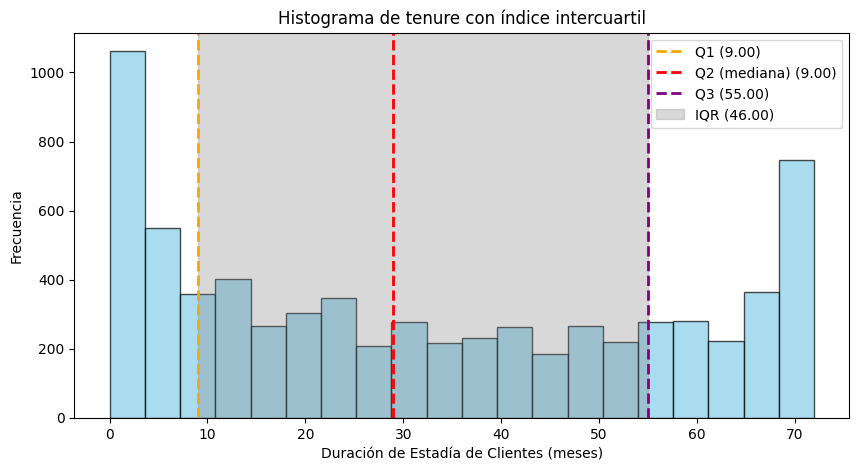

In [174]:
from utils import graficar_histograma_con_datos_intercuartiles

graficar_histograma_con_datos_intercuartiles(df, "tenure", "Duración de Estadía de Clientes (meses)", figsize=(10, 5))

De esta gráfica, podemos indicar que las estadías estan un poco sesgadas a la izquierda, lo que indica que los clientes tienden a no quedarse tanto en la empresa.

Luego, graficamos histograma de la columna de MonthlyCharges

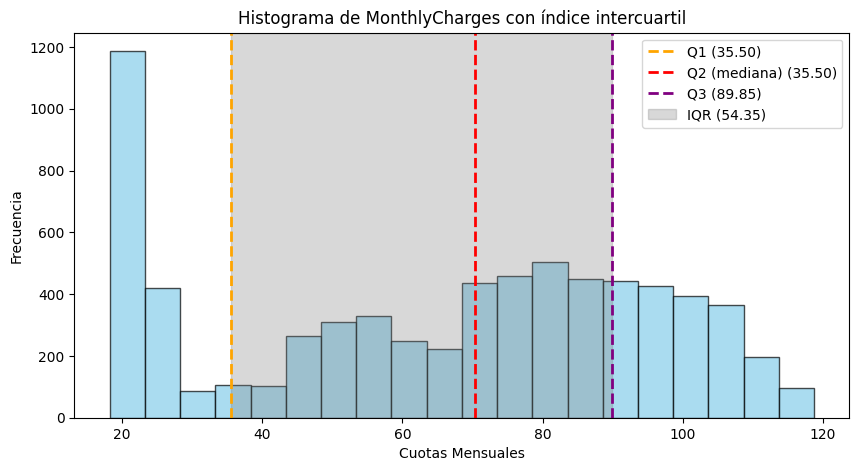

In [175]:
graficar_histograma_con_datos_intercuartiles(df, "MonthlyCharges", "Cuotas Mensuales", figsize=(10, 5))

Este gráfico muestra que una gran cantidad de clientes prefieren servicios mensuales más económicos (aproximadamente entre 20 y 30). Entre aquellos que optan por cuotas más altas se observa que, en general, a medida que aumenta la cuota, también crece el número de clientes. Esto sugiere que los clientes suelen inclinarse hacia dos extremos: pagar por un servicio básico y económico, o bien invertir en uno más completo y de mayor costo.

Adicionalmente, graficamos histograma y boxplot de los datos de ventas totales (TotalCharges).

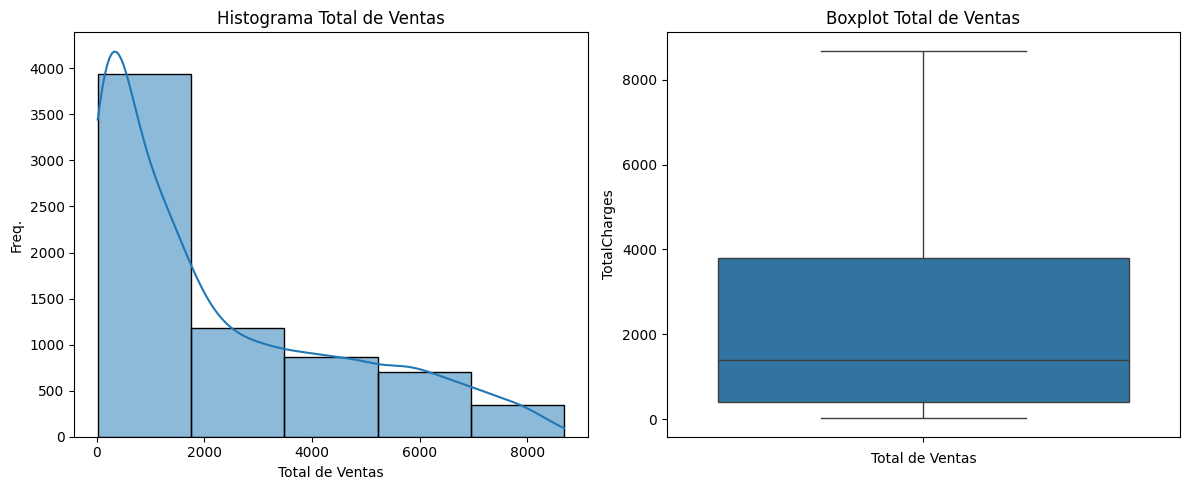

In [176]:
from utils import graficar_histograma_y_boxplot

# Tenemos en cuenta que TotalCharges cuenta con valores nulos.
graficar_histograma_y_boxplot(df["TotalCharges"].dropna(), "Total de Ventas")

Del histograma, se observa que los montos totales cobrados a los clientes presentan una distribución sesgada a la izquierda, lo que sugiere que la mayoría de los clientes tiende a pagar montos totales menores. El boxplot confirma esta tendencia y, además, indica que no se encuentran outliers en el dataset.

### Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Un dato interesante a evaluar, es qué tanto afecta la cuota mensual en la estadía de los clientes. Para esto, elaboramos un diagrama de dispersión.

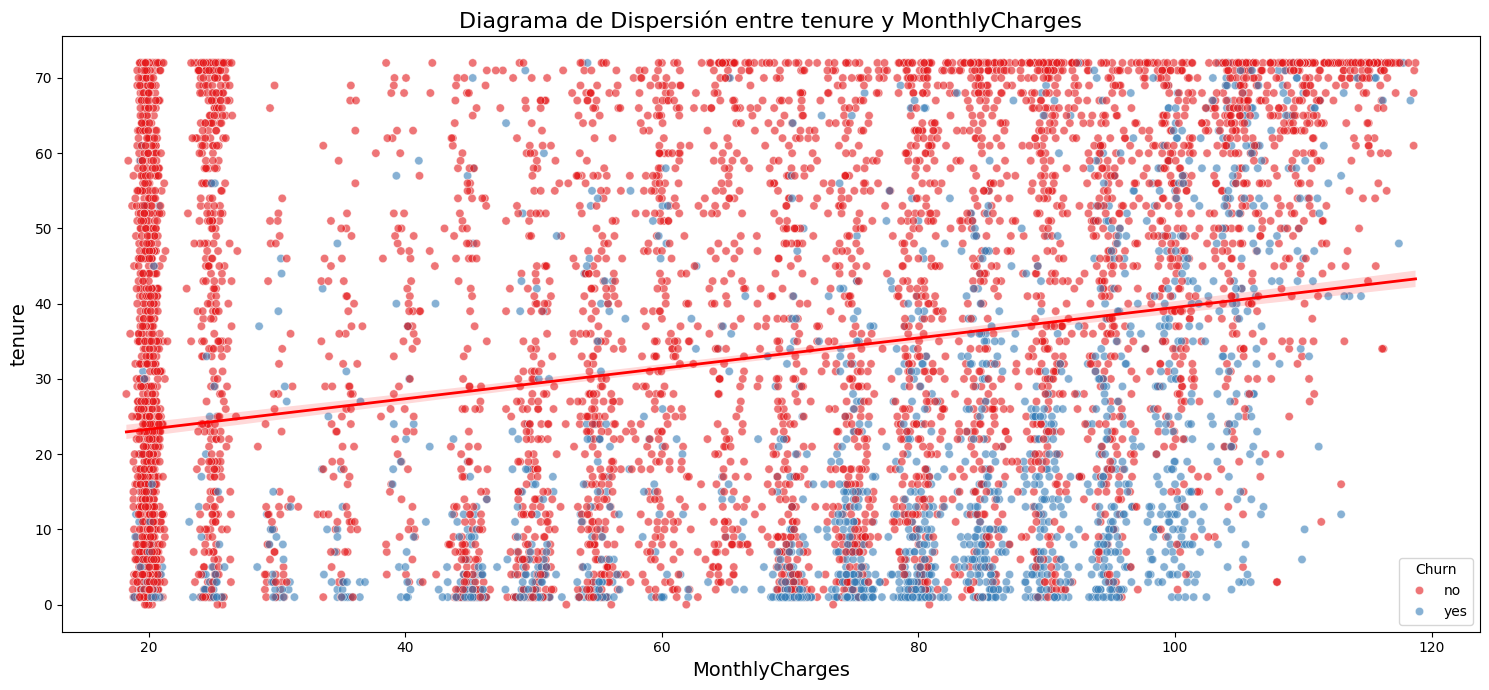

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_tenure = df[["MonthlyCharges", "tenure", "Churn"]].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x="MonthlyCharges",
    y="tenure",
    hue="Churn",
    data=df_scatter_tenure,
    alpha=0.6, 
    palette='Set1',
)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre tenure y MonthlyCharges', fontsize=16)
plt.xlabel('MonthlyCharges', fontsize=14)
plt.ylabel('tenure', fontsize=14)

sns.regplot(
    x="MonthlyCharges",
    y="tenure",
    data=df_scatter_tenure,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


Este gráfico muestra que, aunque la duración de la permanencia de los clientes en la empresa no parece variar significativamente en los rangos de costos más bajos, se observa una leve disminución en la estadía para cuotas de valor intermedio. Sin embargo, con cuotas más altas, la dispersión en la duración de permanencia vuelve a aumentar, indicando que algunos clientes permanecen más tiempo. Esto refuerza una conclusión anterior: los clientes tienden a evitar las cuotas intermedias, prefiriendo opciones de bajo o alto costo. Además, se observa una tendencia a que los clientes permanezcan más tiempo en la empresa a medida que el monto de la cuota aumenta a partir de una cuota mensual de 100.

Adicionalmente, se puede notar que la cantidad de clientes que dan de baja los servicios va incrementando a medida que incrementa la cuota.

También, graficamos la correlación entre la estadía y el total cobrado. Como la estadía influye directamente en la cantidad de cuotas pagadas, es muy probable ver que  el monto total cobrado incremente con la estadía del cliente. 

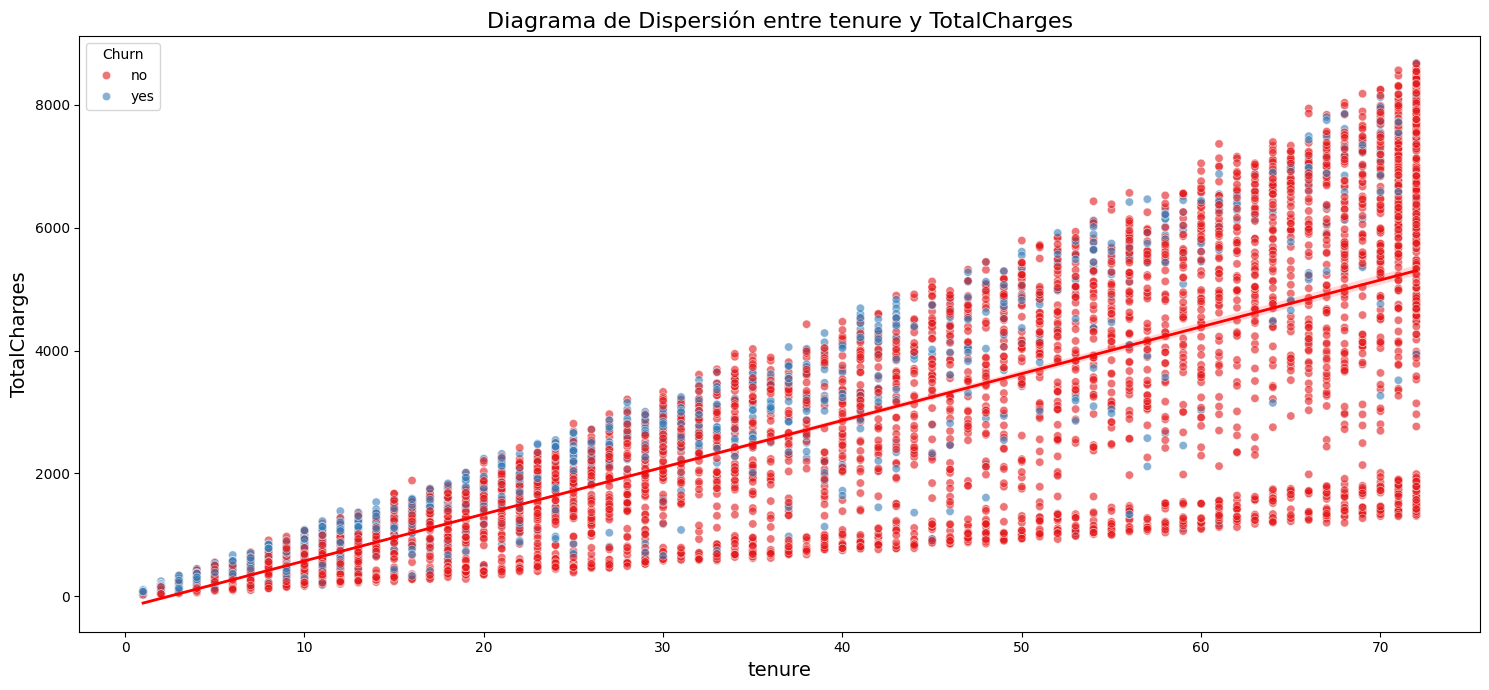

In [178]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_tenure_total = df[["TotalCharges", "tenure", "Churn"]].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x="tenure",
    y="TotalCharges",
    hue="Churn",
    data=df_scatter_tenure_total,
    alpha=0.6, 
    palette='Set1',
)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre tenure y TotalCharges', fontsize=16)
plt.xlabel('TotalCharges', fontsize=14)
plt.ylabel('tenure', fontsize=14)

sns.regplot(
    x="tenure",
    y="TotalCharges",
    data=df_scatter_tenure_total,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


Efectivamente, se puede notar el incremento de gasto a medida que los clientes se quedan más tiempo.

Procedemos a graficar correlaciones entre las variables.

In [179]:
# Cálculo de la correlación de Pearson
columnas_de_interes = ["tenure", "MonthlyCharges", "TotalCharges"]
correlation_matrix = df[[*columnas_de_interes]].corr(method='pearson')
print(correlation_matrix)

                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


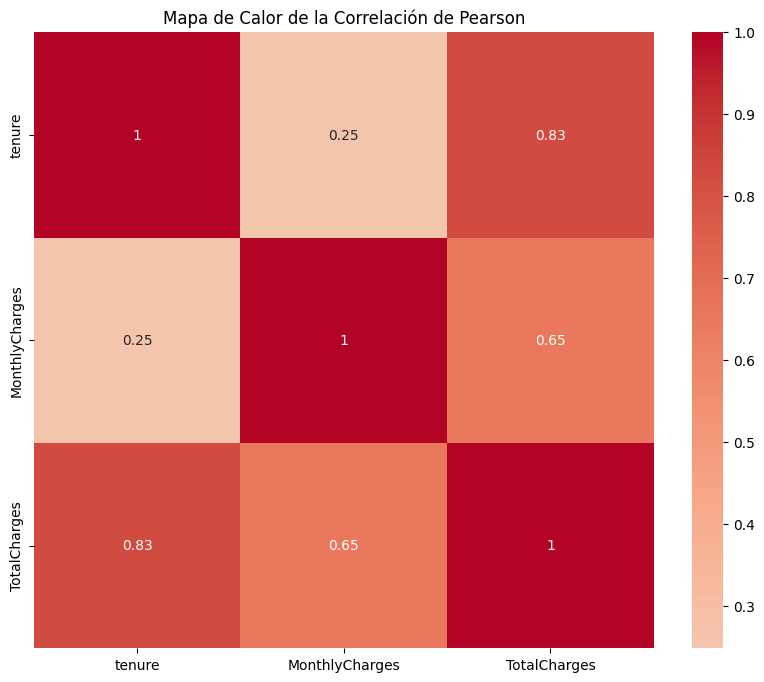

In [180]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

Aquí se puede notar que no existen correlaciones muy fuertes entre la estadía y el cobro mensual. La correlación entre la estadía y los cargos totales es alta, pero esto es esperable ya que TotalCharges es nada más la acumulación de pagos del cliente y a medida que aumenta la estadía aumenta el monto.

Lo que sí se puede notar es una correlación entre MonthlyCharges y TotalCharges levelemnte alta, pero esto también podría explicarse porque a mayor cuota mensual el por lo cual sería interesante ver un diagrama de dispersión entre MonthlyCharges y TotalCharges para verificar esto.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_74003/2046290630.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


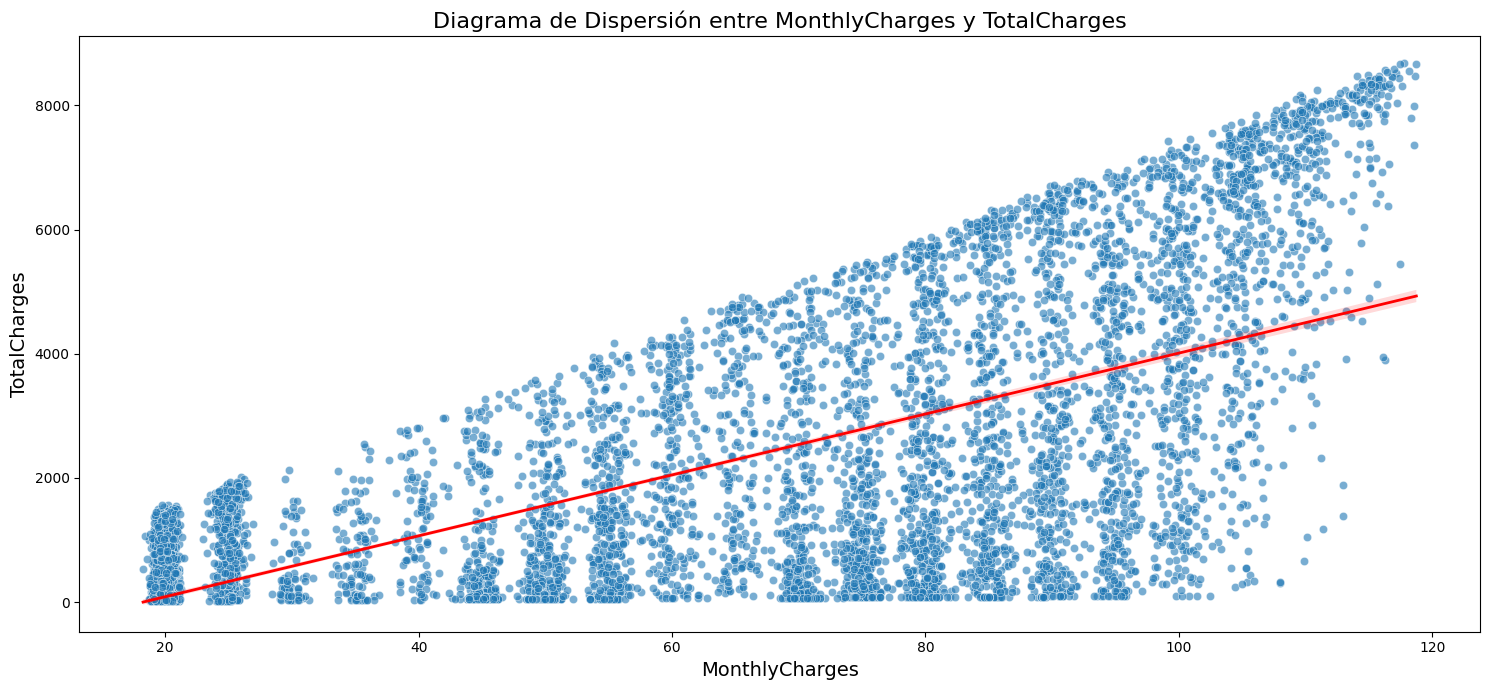

In [181]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_charges = df[["MonthlyCharges", "TotalCharges"]].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x="MonthlyCharges",
    y="TotalCharges",
    data=df_scatter_charges,
    alpha=0.6, 
    palette='Set1',
)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre MonthlyCharges y TotalCharges', fontsize=16)
plt.xlabel('MonthlyCharges', fontsize=14)
plt.ylabel('TotalCharges', fontsize=14)

sns.regplot(
    x="MonthlyCharges",
    y="TotalCharges",
    data=df_scatter_charges,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

Otro dato interesante sería ver la distribución de las cuotas mensuales de clientes por género. Para esto, creamos un boxplot para analizar este dato.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_74003/1326513857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


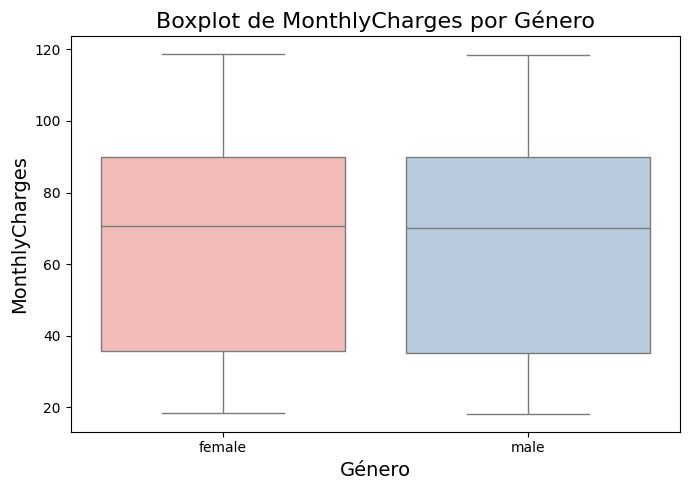

In [182]:
df_box_gender_monthly_charges = df[["gender", "MonthlyCharges"]].dropna()

plt.figure(figsize=(7, 5))

sns.boxplot(
    x="gender",
    y="MonthlyCharges",
    data=df_box_gender_monthly_charges,
    palette='Pastel1'
)

plt.title("Boxplot de MonthlyCharges por Género", fontsize=16)
plt.xlabel("Género", fontsize=14)
plt.ylabel("MonthlyCharges", fontsize=14)

plt.tight_layout()
plt.show()


Se puede notar de este gráfico una gran dispersión, pero a la vez, que no hay mucha diferencia en los datos de gastos por género, ya que los datos intercuartiles son los mismos.

Graficamos también la distribución de ventas totales por género.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_74003/2499468127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


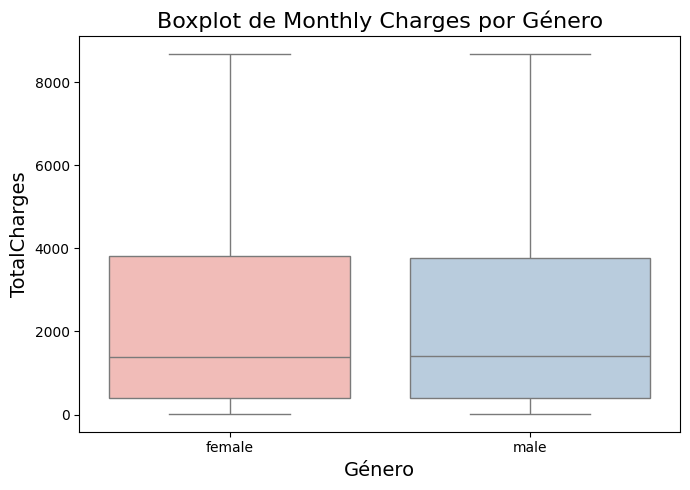

In [183]:
df_box_gender_total_charges = df[["gender", "TotalCharges"]].dropna()

plt.figure(figsize=(7, 5))

sns.boxplot(
    x="gender",
    y="TotalCharges",
    data=df_box_gender_total_charges,
    palette='Pastel1'
)

plt.title("Boxplot de Monthly Charges por Género", fontsize=16)
plt.xlabel("Género", fontsize=14)
plt.ylabel("TotalCharges", fontsize=14)

plt.tight_layout()
plt.show()


De la misma manera que en MonthlyCharges, no se puede visualizar una diferencia muy grande en la distribución.

Realizamos también un gráfico para visualizar la distribución de cuotas mensuales teniendo en cuenta la forma de pago de los clientes.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_74003/2894886575.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


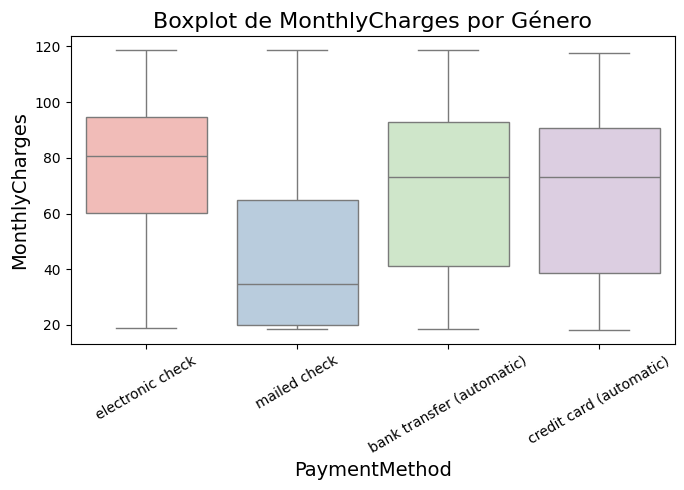

In [184]:
df_box_payment_method_monthly_charges = df[["PaymentMethod", "MonthlyCharges"]].dropna()

plt.figure(figsize=(7, 5))

sns.boxplot(
    x="PaymentMethod",
    y="MonthlyCharges",
    data=df_box_payment_method_monthly_charges,
    palette='Pastel1'
)

plt.title("Boxplot de MonthlyCharges por Género", fontsize=16)
plt.xlabel("PaymentMethod", fontsize=14)
plt.ylabel("MonthlyCharges", fontsize=14)

plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


Otro dato importante a sacar, son las cantidades totales de ingresos por cada forma de pago.

In [185]:
df_agrupado_cuota_mensual_tipo_pago = df.groupby("PaymentMethod")["TotalCharges"].sum().reset_index().sort_values("TotalCharges", ascending=False)

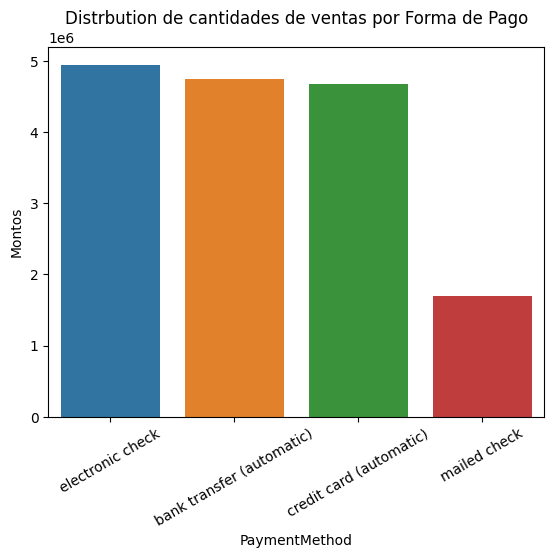

In [186]:
sns.barplot(
    df_agrupado_cuota_mensual_tipo_pago,
    x="PaymentMethod",
    y="TotalCharges",
    hue="PaymentMethod",
)

plt.ylabel("Montos")
plt.xticks(rotation=30)

plt.title("Distrbution de cantidades de ventas por Forma de Pago")
plt.show()

Se puede notar de este gráfico que la forma de pago con la que más se recaudó es con electronic check.

Tambien, visualizamos la cant. de clientes por tipo de pago.

In [187]:
df_agrupado_cant_clientes_tipo_pago = df.groupby("PaymentMethod")["TotalCharges"].count().reset_index().sort_values("TotalCharges", ascending=False)

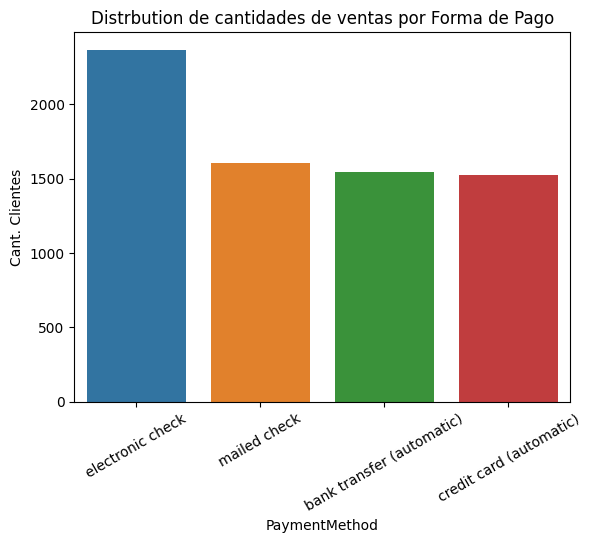

In [188]:
sns.barplot(
    df_agrupado_cant_clientes_tipo_pago,
    x="PaymentMethod",
    y="TotalCharges",
    hue="PaymentMethod",
)

plt.ylabel("Cant. Clientes")
plt.xticks(rotation=30)

plt.title("Distrbution de cantidades de ventas por Forma de Pago")
plt.show()

De este gráfico se puede notar que la forma de pago más utilizada por los clientes es el de electronic check.

#### Análsis de clientes que cancelan el servicio

Analizamos los clientes que cancelan el servicio por forma de pago, para analizar si la forma de pago afecta a los porcentajes de retiro.

In [189]:
df_agrupado_retirados_forma_pago = df.groupby(["PaymentMethod", "Churn"])["customerID"].count().reset_index().rename(columns={"customerID": "amount"})

df_agrupado_retirados_forma_pago

,PaymentMethod,Churn,amount
0,bank transfer (automatic),no,1286
1,bank transfer (automatic),yes,258
2,credit card (automatic),no,1290
3,credit card (automatic),yes,232
4,electronic check,no,1294
5,electronic check,yes,1071
6,mailed check,no,1304
7,mailed check,yes,308


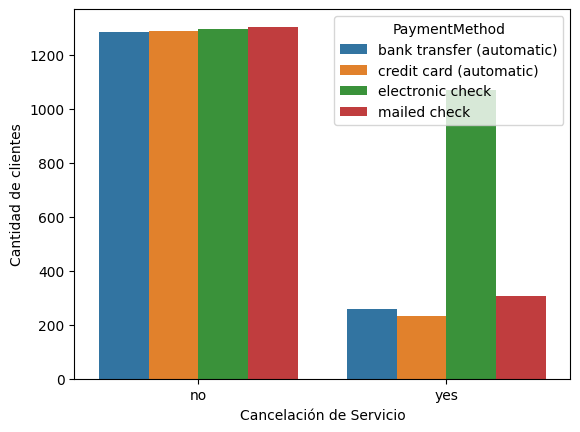

In [190]:
sns.barplot(df_agrupado_retirados_forma_pago, x="Churn", y="amount", hue="PaymentMethod")

plt.xlabel("Cancelación de Servicio")
plt.ylabel("Cantidad de clientes")
plt.show()

Del gráfico se puede notar que una cantidad importante de cliente que cancelaron el servicio pagaban por medio de electronic check.

Ahora, analizamos los clientes que cancelan el servicio por tipo de contrato, para analizar si este indicador afecta a los porcentajes de retiro.

In [191]:
df_agrupado_retirados_tipo_contrato = df.groupby(["Contract", "Churn"])["customerID"].count().reset_index().rename(columns={"customerID": "amount"})

df_agrupado_retirados_tipo_contrato

,Contract,Churn,amount
0,month-to-month,no,2220
1,month-to-month,yes,1655
2,one year,no,1307
3,one year,yes,166
4,two year,no,1647
5,two year,yes,48


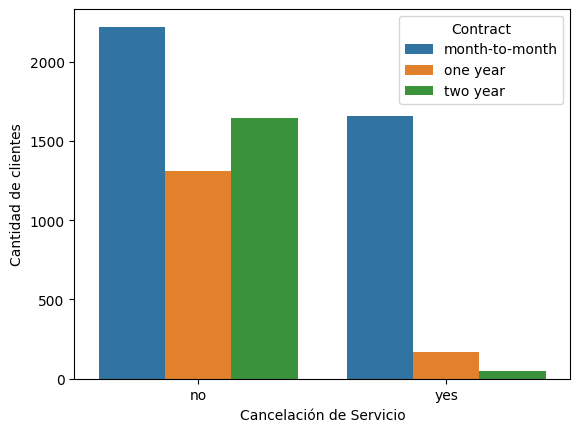

In [192]:
sns.barplot(df_agrupado_retirados_tipo_contrato, x="Churn", y="amount", hue="Contract")

plt.xlabel("Cancelación de Servicio")
plt.ylabel("Cantidad de clientes")
plt.show()

Podemos ver también en este gráfico, que una gran cantidad de clientes que cancelaron también tenían contratos mensuales.

Analizamos también por dependientes, para verificar si esto afecta las cancelaciones.

In [193]:
df_agrupado_retirados_dependent = df.groupby(["Dependents", "Churn"])["customerID"].count().reset_index().rename(columns={"customerID": "amount"})

df_agrupado_retirados_dependent

,Dependents,Churn,amount
0,no,no,3390
1,no,yes,1543
2,yes,no,1784
3,yes,yes,326


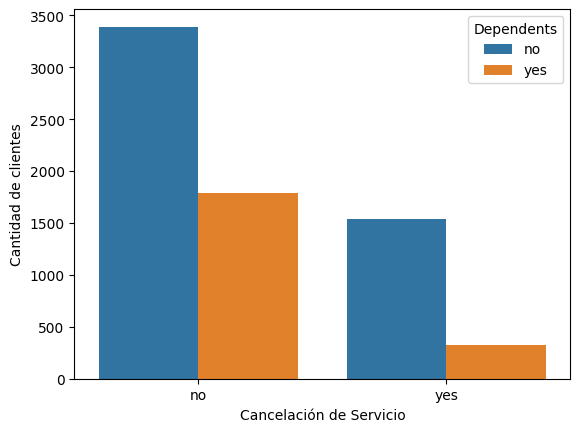

In [194]:
sns.barplot(df_agrupado_retirados_dependent, x="Churn", y="amount", hue="Dependents")

plt.xlabel("Cancelación de Servicio")
plt.ylabel("Cantidad de clientes")
plt.show()

Notamos también aquí que la cant. de gente que cancela el servicio y no posee dependientes es mayor a los que sí poseen dependientes.

Finalmente, analizamos como afecta el hecho de que los clientes posean una pareja a la hora de cancelar el servicio.

In [195]:
df_agrupado_retirados_partner = df.groupby(["Partner", "Churn"])["customerID"].count().reset_index().rename(columns={"customerID": "amount"})

df_agrupado_retirados_partner

,Partner,Churn,amount
0,no,no,2441
1,no,yes,1200
2,yes,no,2733
3,yes,yes,669


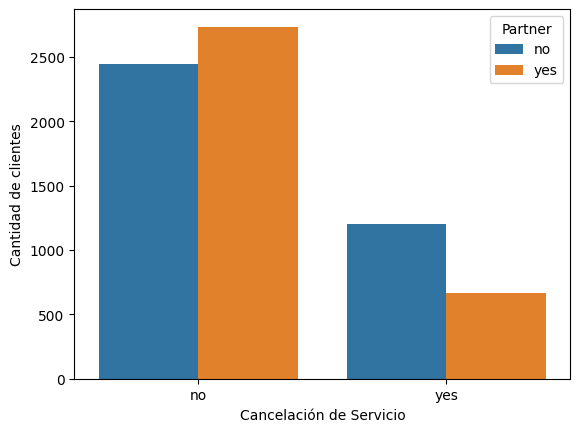

In [196]:
sns.barplot(df_agrupado_retirados_partner, x="Churn", y="amount", hue="Partner")

plt.xlabel("Cancelación de Servicio")
plt.ylabel("Cantidad de clientes")
plt.show()

También se visualiza en el gráfico que la cantidad de personas que cancelan el servicio y no tienen pareja es mayor a la cant. de clientes que sí tienen pareja.